### 首先运行使用的库

In [1]:
import numpy as np
from pandas import DataFrame, Series
import pandas as pd

## 第一、二问 读取MoviesLens 1M数据，存储为Pandas的DataFrame； 将DataFrame数据改为自己代码所需要的结构；

In [2]:
# 用户信息（users.dat表，数据无表目信息）
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']  #用户名::性别：年龄::职业::邮政编码
users = pd.read_table('data/users.dat', sep='::', header=None, names=unames, engine='python')
#评分信息
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']     #用户名:: MovieID ::评级::时间戳
ratings = pd.read_table('data/ratings.dat', sep='::', header=None, names=rnames, engine='python')
#电影信息
mnames = ['movie_id', 'title', 'genres']                    #MovieID ::标题::流派
movies = pd.read_table('data/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [35]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


## 第三题 学习协同过滤算法，写出协同过滤算法相应的函数；
###            输入为两个用户 输出为这个两个用户的相似度

In [273]:
def collaboratIve_filtering(user_ID_1,user_ID_2):
    #处理数据 得到一个result 只包含两个用户对不同电影的评分
    t1 = ratings.loc[ratings['user_id'] == user_ID_1]   #取出ID 等于 user1 的DataFrame
    t2 = ratings.loc[ratings['user_id'] == user_ID_2]   #同上
    id_1 = 'ratingofID_' + str(user_ID_1)
    id_2 = 'ratingofID_' + str(user_ID_2)
    t1 = t1.rename(columns={'rating':id_1}, inplace = False)  #修改列名 将评分修改成ID名 方便合并后不会冲突
    t2 = t2.rename(columns={'rating':id_2}, inplace = False)  #修改列名
    x1 = t1.groupby('movie_id').sum()                       #删去除了评分以外的无关项 只留下电影id 和用户评分
    f1 = x1.drop(['user_id','timestamp'],axis =1)
    x2 = t2.groupby('movie_id').sum()
    f2 = x2.drop(['user_id','timestamp'],axis = 1)
    result=pd.concat([f1,f2],sort=True,axis = 1)  #合并两个用户的DataFrame  注意axis = 1  
    
    #下面为对处理好的数据 计算欧式距离
    distances = result[id_1].sub(result[id_2], fill_value = 0)  #两个Series 即两个用户对不同电影评分 相减
    div = ((distances**2).values.sum())**0.5    #div 为欧式距离
    sim = 1/(1+div)   #表示相似度
    return sim

### 以下为此函数的测试 以用户id = 1， id =2 为例，实例在测试后。

In [263]:
t1 = ratings.loc[ratings['user_id'] == 1]   #取出每一个名字的 DataFrame 如上
t2 = ratings.loc[ratings['user_id'] == 2]   #取出每一个名字的 DataFrame 如上

### 这里修改了Dataframe 的列名用用户的ID来当 评分的索引，以免出现多个用户的评分的索引相同，警告为修改列名

In [264]:
t1=t1.rename(columns={'rating':'ratingofID_1'}, inplace = False)  #修改列名
t2=t2.rename(columns={'rating':'ratingofID_2'}, inplace = False)  #修改列名

In [265]:
x1 = t1.groupby('movie_id').sum()
f1 = x1.drop(['user_id','timestamp'],axis =1)
x2 = t2.groupby('movie_id').sum()
f2 = x2.drop(['user_id','timestamp'],axis = 1)

In [266]:
result=pd.concat([f1,f2],sort=True,axis = 1)  #合并Frame  注意axis = 1 
result

,ratingofID_1,ratingofID_2
movie_id,,
1,5.0,NaN
21,NaN,1.0
48,5.0,NaN
95,NaN,2.0
110,NaN,5.0
150,5.0,NaN
163,NaN,4.0
165,NaN,3.0
235,NaN,3.0


### 下面为计算欧几里德距离 ：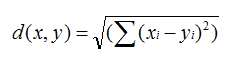

In [267]:
distances = result['ratingofID_1'].sub(result['ratingofID_2'], fill_value = 0)  #两个Series 即两个用户对不同电影评分 相减
div = ((distances**2).values.sum())**0.5          

### 计算相似度 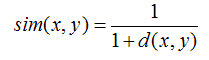

In [268]:
sim = 1/(1+div)
sim

0.019230769230769232

#### 直接调用函数的实例    与测试运算结果一致    警告为修改列名

In [274]:
sim = collaboratIve_filtering(1,2)
sim

0.019230769230769232

## 第四题 输入两个用户，输出两个用户公共电影的评分；

In [175]:
user1 = input("输入用户1的ID ：")
user2 = input("输入用户2的ID ：")

输入用户1的ID ：1
输入用户2的ID ：2


### 对两个用户的数据采取同第三题的相同的处理方式

In [251]:
def common_rating(user_ID_1,user_ID_2):
    #处理数据 得到一个result 只包含两个用户对不同电影的评分
    t1 = ratings.loc[ratings['user_id'] == user_ID_1]   #取出ID 等于 user1 的DataFrame
    t2 = ratings.loc[ratings['user_id'] == user_ID_2]   #同上
    id_1 = 'ratingofID_' + str(user_ID_1)
    id_2 = 'ratingofID_' + str(user_ID_2)
    t1 = t1.rename(columns={'rating':id_1}, inplace = False)  #修改列名 将评分修改成ID名 方便合并后不会冲突
    t2 = t2.rename(columns={'rating':id_2}, inplace = False)  #修改列名
    x1 = t1.groupby('movie_id').sum()                       #删去除了评分以外的无关项 只留下电影id 和用户评分
    f1 = x1.drop(['user_id','timestamp'],axis =1)
    x2 = t2.groupby('movie_id').sum()
    f2 = x2.drop(['user_id','timestamp'],axis = 1)
    result=pd.concat([f1,f2],sort=True,axis = 1)  #合并两个用户的DataFrame  注意axis = 1  
    
    #这里为删除两个用户 含有NaN的数据 即有一方用户没有看过的电影  得到的结果为两个用户共同看过的电影
    common = result.dropna(axis=0,how='any')
    return print(common)

### 以下为函数 的测试

In [252]:
user_ID_1 = 1;
user_ID_2 = 2;

In [275]:
t1 = ratings.loc[ratings['user_id'] == user_ID_1]   #取出ID 等于 user1 的DataFrame
t2 = ratings.loc[ratings['user_id'] == user_ID_2]   #同上
id_1 = 'ratingofID_' + str(user_ID_1)
id_2 = 'ratingofID_' + str(user_ID_2)
t1 = t1.rename(columns={'rating':id_1}, inplace = False)  #修改列名 将评分修改成ID名 方便合并后不会冲突
t2 = t2.rename(columns={'rating':id_2}, inplace = False)  #修改列名
x1 = t1.groupby('movie_id').sum()                       #删去除了评分以外的无关项 只留下电影id 和用户评分
f1 = x1.drop(['user_id','timestamp'],axis =1)
x2 = t2.groupby('movie_id').sum()
f2 = x2.drop(['user_id','timestamp'],axis = 1)
result=pd.concat([f1,f2],sort=True,axis = 1)  #合并两个用户的DataFrame  注意axis = 1  

In [208]:
result

,ratingofID_1,ratingofID_2
movie_id,,
1,5.0,NaN
21,NaN,1.0
48,5.0,NaN
95,NaN,2.0
110,NaN,5.0
150,5.0,NaN
163,NaN,4.0
165,NaN,3.0
235,NaN,3.0


In [209]:
result.dropna(axis=0,how='any')

,ratingofID_1,ratingofID_2
movie_id,,
1193,5.0,5.0
1207,4.0,4.0
1246,4.0,5.0
1962,4.0,5.0
2028,5.0,4.0
2321,3.0,3.0
3105,5.0,4.0


### 函数运行结果

In [254]:
common_rating(1,2000)

          rating  rating
movie_id                
1            5.0     4.0
150          5.0     3.0
260          4.0     4.0
527          5.0     5.0
595          5.0     5.0
783          4.0     4.0
1193         5.0     5.0
1721         4.0     4.0
1907         4.0     5.0
2028         5.0     5.0
2294         4.0     4.0
2321         3.0     5.0
2355         5.0     4.0
2762         4.0     4.0
2791         4.0     3.0
2804         5.0     5.0
3408         4.0     4.0


## 第五题 输入两个用户，计算出用户偏好的相似度；

### 直接调用协同过滤算法的函数 返回两个用户的相似度

In [234]:
user1 = int(input("输入用户1的ID ："))
user2 = int(input("输入用户2的ID ："))

输入用户1的ID ：1
输入用户2的ID ：2000


In [278]:
print("ID为： ",user1, "的用户 与ID为： ", user2 , "的用户的相似度为：",collaboratIve_filtering(user1,user2))

ID为：  1 的用户 与ID为：  2000 的用户的相似度为： 0.02307133410685282
